# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

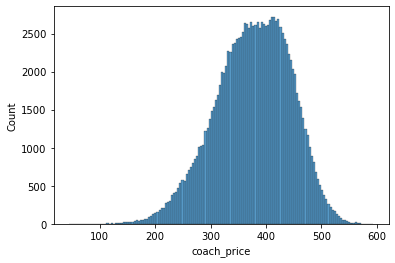

,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


<Figure size 432x288 with 0 Axes>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")

# OUTPUTS don't fit to space provided.
# Comment out flight.info() and flight.describe() after viewing. 
# There is not enough space for showing flight.head().

# flight.info()
# 129780 records
# 129780 non-null; missing values may not be recognized as null, e.g., 0.

# flight.describe()
# Not very useful for now.

# print(flight.head(10))
# So far, records seem complete.

## Task 1
# Coach ticket prices have 3 decimal places.

# Histogram: sns.histplot() 
sns.histplot(flight.coach_price)
plt.show()
plt.clf()

# flight.describe() shows "min", "max", "mean" etc.
flight.describe()
# Coach high values (75%): 427
# Coach low values (25%): 331
# Coach mean: 376
# Coach median (50%): 380
# $500 is an expensive ticket for coach.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [19]:
## Task 2
# Creating new dataframe for hours == 8,
# using a new method: df.query("<column> <operator> <value>")
# OUTPUTS don't fit to space provided. Comment out histogram to see this.
flight_8 = flight.query("hours == 8")
flight_8.describe()
# Coach high values (75%): 480
# Coach low values (25%): 390
# Coach mean: 431
# Coach median (50%): 437
# $500 is closer to the new mean but still expensive. 

# Histogram: sns.histplot() 
# sns.histplot(flight_8.coach_price)
# plt.show()
# plt.clf()

# Placing the plot before .describe() (as in Task 1) may show both outputs.


,miles,passengers,delay,coach_price,firstclass_price,hours
count,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.0
mean,4207.205771,207.270691,14.167426,431.834377,1571.496572,8.0
std,69.083475,13.098447,57.863457,64.083280,153.833271,0.0
min,4125.000000,148.000000,0.000000,170.770000,1128.770000,8.0
25%,4154.000000,203.000000,9.000000,390.266250,1415.645000,8.0
50%,4190.000000,209.000000,10.000000,437.115000,1632.905000,8.0
75%,4243.000000,215.000000,13.000000,480.043750,1693.000000,8.0
max,4548.000000,233.000000,1509.000000,593.635000,1846.140000,8.0


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

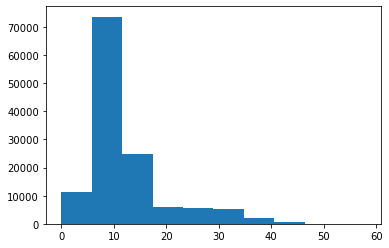

<Figure size 432x288 with 0 Axes>

In [30]:
## Task 3
# Try histogram of delays
# sns.histplot(flight.delay)
# The plot looks empty.

# Try delays less than 240 minutes
# sns.histplot(flight.delay[flight.delay <= 240])
# Now, the x-axis goes from 0 to 60; not 240.

# Try 480 min
# sns.histplot(flight.delay[flight.delay <= 480])
# Same plot.

# Try 1509, which is the max value
# sns.histplot(flight.delay[flight.delay <= 1509])
# Now, the x-axis goes up to 1600.

# Try 1000, which is the max value
# sns.histplot(flight.delay[flight.delay <= 1000])
# Now, the x-axis again goes up to 60.

# This histogram seems useless.

# It seems, most delays are between 7 and 13 minutes.


plt.hist(flight.delay[flight.delay <= 1000])
# Using plt.hist() has the same problem: x-axis goes up to 60.


plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

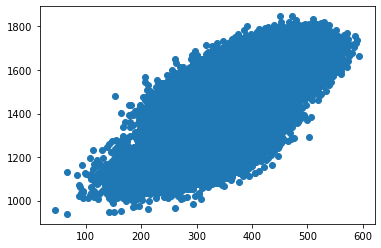

<Figure size 432x288 with 0 Axes>

In [34]:
## Task 4
# Relationship between two variables.
# Scatter. 
plt.scatter(flight.coach_price, flight.firstclass_price)
# Yes, the prices are related.


plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [6]:
## Task 5
# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()


6. How does the number of passengers change in relation to the length of flights?

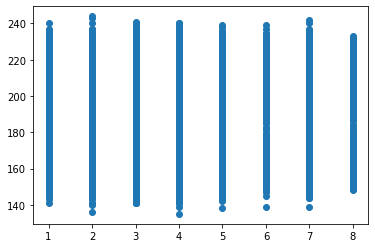

<Figure size 432x288 with 0 Axes>

In [36]:
## Task 6

plt.scatter(flight.hours, flight.passengers)
# No correlation between flight times and passengers.

plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

c:\Users\mal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


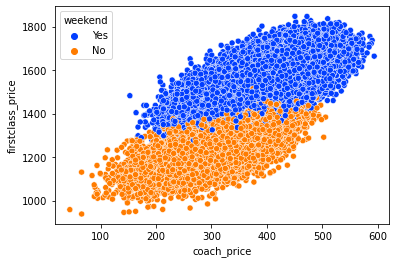

<Figure size 432x288 with 0 Axes>

In [39]:
## Task 7
# Need to look up how to do it with plt.scatter.
# plt.scatter(flight.coach_price, flight.firstclass_price)

sns.scatterplot(flight.coach_price, flight.firstclass_price, hue = flight.weekend, palette='bright')
# Coach and firstclass prices go up on the weekend.

plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

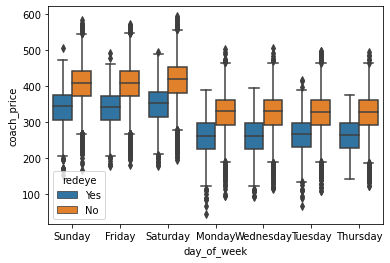

<Figure size 432x288 with 0 Axes>

In [40]:
## Task 8
# Each day of the week: 
# Need 7 display items. Use "day_of_week"
sns.boxplot(x="day_of_week", y="coach_price", hue="redeye", data=flight)
plt.show()
plt.clf()
